In [ ]:
library(tidyverse)

## Deuxième partie : Manipulation des données avec dplyr

1. Avec la fonction `filter()`, trouvez les 8 mamifères qui dorment plus de 16 heures par jour

In [31]:
filter(msleep, sleep_total > 16)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.3833333,6.6,0.01080,3.500
North American Opossum,Didelphis,omni,Didelphimorphia,lc,18.0,4.9,0.3333333,6.0,0.00630,1.700
Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.1166667,4.3,0.00030,0.023
Thick-tailed opposum,Lutreolina,carni,Didelphimorphia,lc,19.4,6.6,NA,4.6,NA,0.370
Little brown bat,Myotis,insecti,Chiroptera,NA,19.9,2.0,0.2000000,4.1,0.00025,0.010
Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NA,5.9,0.08100,60.000
Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NA,NA,7.4,0.00570,0.920


2. Avec la fonction `arrange()`, triez les données par ordre taxonomique (`order`) puis par temps de sommeil croissant (`sleep_total`)

In [34]:
arrange(msleep, order, sleep_total) %>%
    head()

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tenrec,Tenrec,omni,Afrosoricida,NA,15.6,2.3,NA,8.4,0.0026,0.900
Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NA,22.1,NA,899.995
Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NA,NA,21.0,0.0982,14.800
Sheep,Ovis,herbi,Artiodactyla,domesticated,3.8,0.6,NA,20.2,0.1750,55.500
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.4230,600.000
Goat,Capri,herbi,Artiodactyla,lc,5.3,0.6,NA,18.7,0.1150,33.500


3. Avec la fonction `select()`, sélectionnez les colonnes qui commencent par "sleep"

In [36]:
select(msleep, starts_with("sleep")) %>%
    head()

sleep_total,sleep_rem,sleep_cycle
<dbl>,<dbl>,<dbl>
12.1,NA,NA
17.0,1.8,NA
14.4,2.4,NA
14.9,2.3,0.1333333
4.0,0.7,0.6666667
14.4,2.2,0.7666667


4. Avec l'opérateur `%>%`, enchainez les opérations suivantes :
Sélectionnez les colonnes `name`, `order` et `sleep_total`, triez en fonction de `order`puis de  `sleep_total` et enfin filtrer pour les mamifères dormant 16h ou plus.

In [37]:
msleep %>%
    select(name, order, sleep_total) %>%
    arrange(order, sleep_total) %>%
    filter(sleep_total > 16)

name,order,sleep_total
<chr>,<chr>,<dbl>
Big brown bat,Chiroptera,19.7
Little brown bat,Chiroptera,19.9
Long-nosed armadillo,Cingulata,17.4
Giant armadillo,Cingulata,18.1
North American Opossum,Didelphimorphia,18.0
Thick-tailed opposum,Didelphimorphia,19.4
Owl monkey,Primates,17.0
Arctic ground squirrel,Rodentia,16.6


5. Avec la fonction `mutate()`, créez une nouvelle variable `rem_proportion` qui calcule la proportion de sommeil paradoxal (`sleep_rem`) par rapport au sommeil total (`sleep_total`)

In [39]:
msleep %>%
    mutate(rem_proportion = sleep_rem/sleep_total) %>%
    select(name, order, sleep_total, rem_proportion) %>%
    head()

name,order,sleep_total,rem_proportion
<chr>,<chr>,<dbl>,<dbl>
Cheetah,Carnivora,12.1,NA
Owl monkey,Primates,17.0,0.1058824
Mountain beaver,Rodentia,14.4,0.1666667
Greater short-tailed shrew,Soricomorpha,14.9,0.1543624
Cow,Artiodactyla,4.0,0.1750000
Three-toed sloth,Pilosa,14.4,0.1527778


### Produite des résumés informatifs avec `summarise`

In [40]:
msleep %>% 
    summarise(avg_sleep = mean(sleep_total), 
              min_sleep = min(sleep_total),
              max_sleep = max(sleep_total),
              total = n())

avg_sleep,min_sleep,max_sleep,total
<dbl>,<dbl>,<dbl>,<int>
10.43373,1.9,19.9,83


6. Avec les fonctions `group_by()` et `summarise()` calculez, pour chaque ordre taxonomique : le nombre d'animaux, le temps de sommeil moyen, le temps de sommeil minimal et le temps de sommeil maximal.

In [41]:
msleep %>% 
    group_by(order) %>%
    summarise(avg_sleep = mean(sleep_total), 
              min_sleep = min(sleep_total),
              max_sleep = max(sleep_total),
              total = n())

order,avg_sleep,min_sleep,max_sleep,total
<chr>,<dbl>,<dbl>,<dbl>,<int>
Afrosoricida,15.600000,15.6,15.6,1
Artiodactyla,4.516667,1.9,9.1,6
Carnivora,10.116667,3.5,15.8,12
Cetacea,4.500000,2.7,5.6,3
Chiroptera,19.800000,19.7,19.9,2
Cingulata,17.750000,17.4,18.1,2
Didelphimorphia,18.700000,18.0,19.4,2
Diprotodontia,12.400000,11.1,13.7,2
Erinaceomorpha,10.200000,10.1,10.3,2


## Troisième partie : Ranger des données avec tidyr

In [42]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


1. En utilisant la fonction `pivot_longer()`, créez un jeu de données où les étiquettes `Sepal.Length` `Sepal.Width`  `Petal.Length` `Petal.Width` sont bien rangées dans une colonne appelée `Variables`. Les mesures correspondantes sont rangées dans une colonne appelée `Mesures`.

In [43]:
pivot_longer(iris, cols = -Species) %>%
    head()

Species,name,value
<fct>,<chr>,<dbl>
setosa,Sepal.Length,5.1
setosa,Sepal.Width,3.5
setosa,Petal.Length,1.4
setosa,Petal.Width,0.2
setosa,Sepal.Length,4.9
setosa,Sepal.Width,3.0


2. À partir du jeu de données précédent, créez le boxplot attendu. 

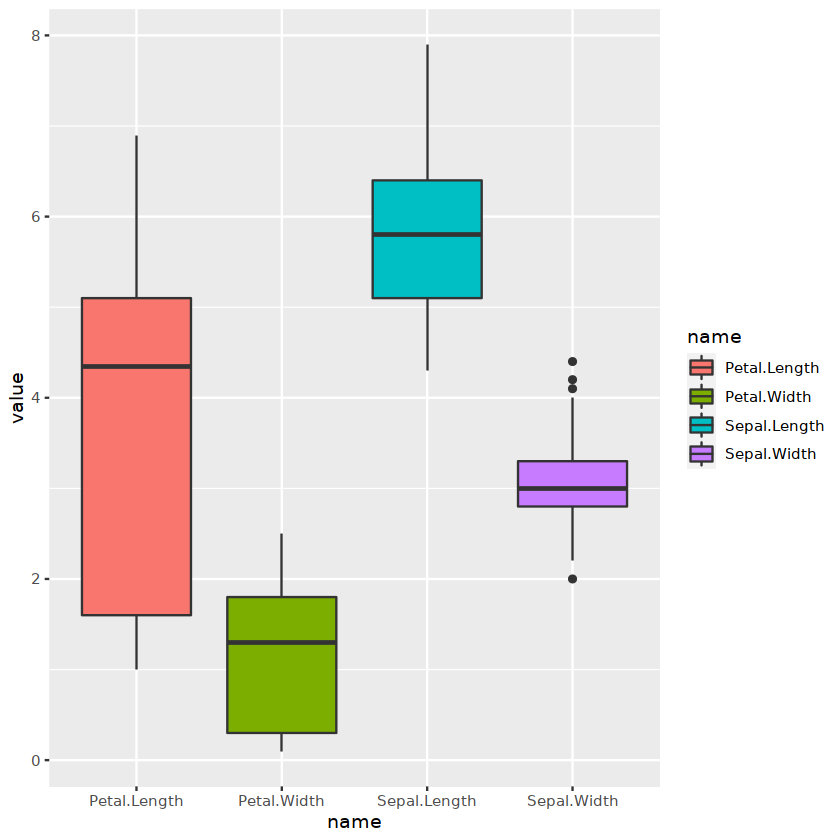

In [45]:
pivot_longer(iris, cols = -Species) %>%
    ggplot(mapping = aes(x = name, y = value)) + geom_boxplot(mapping = aes(fill = name))

3. Avec la fonction `separate()` séparez le data frame suivant en trois colonnes : Year, Month et Day 

In [46]:
data.frame(Date = as.Date('2017-01-01') + 0:12)

Date
<date>
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09


In [47]:
data.frame(Date = as.Date('2017-01-01') + 0:12) %>%
separate(col = Date, into = c("Year", "Month", "Day"), sep = "-")

Year,Month,Day
<chr>,<chr>,<chr>
2017,01,01
2017,01,02
2017,01,03
2017,01,04
2017,01,05
2017,01,06
2017,01,07
2017,01,08
2017,01,09
